# Chat Executor: with function calling

This notebook walks through an example creating a chat executor that uses function calling.
This is useful for getting started quickly.
However, it is highly likely you will want to customize the logic - for information on that, check out the other examples in this folder.

## Set up the chat model and tools

Here we will define the chat model and tools that we want to use.
Importantly, this model MUST support OpenAI function calling.

In [1]:
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import chat_agent_executor
from langchain_core.messages import HumanMessage

In [2]:
tools = [TavilySearchResults(max_results=1)]
model = ChatOpenAI()

## Create executor

We can now use the high level interface to create the executor

In [3]:
app = chat_agent_executor.create_function_calling_executor(model, tools)

We can preview the structure of the graph by calling `get_graph().draw_png()`

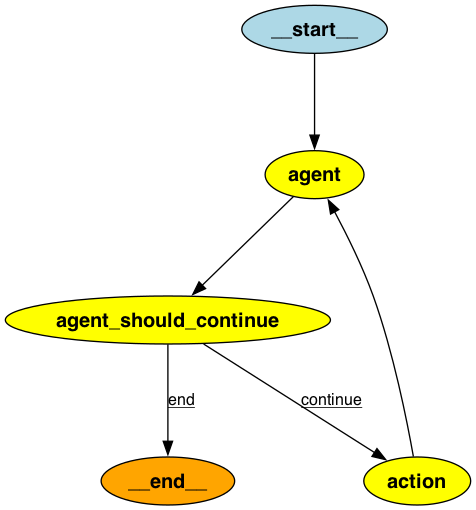

In [7]:
from IPython.display import Image

Image(app.get_graph().draw_png())

We can now invoke this executor. The input to this must be a dictionary with a single `messsages` key that contains a list of messages.

In [4]:
inputs = {"messages": [HumanMessage(content="what is the weather in sf")]}
for s in app.stream(inputs):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"query":"weather in San Francisco"}', 'name': 'tavily_search_results_json'}})]}
----
{'messages': [FunctionMessage(content='[{\'url\': \'https://weather.com/weather/tenday/l/San Francisco CA USCA0987:1:US\', \'content\': "Comfy & Cozy\\nThat\'s Not What Was Expected\\nOutside\\n\'No-Name Storms\' In Florida\\nGifts From On High\\nWhat To Do For Wheezing\\nSurviving The Season\\nStay Safe\\nAir Quality Index\\nAir quality is considered satisfactory, and air pollution poses little or no risk.\\n Health & Activities\\nSeasonal Allergies and Pollen Count Forecast\\nNo pollen detected in your area\\nCold & Flu Forecast\\nFlu risk is low in your area\\nWe recognize our responsibility to use data and technology for good. recents\\nSpecialty Forecasts\\n10 Day Weather-San Francisco, CA\\nToday\\nMon 18 | Day\\nConsiderable cloudiness. Tue 19\\nTue 19 | Day\\nLight rain early...then remaining cloudy with sho